## Sequential Workflow

In [5]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict

In [15]:
# Define State
class BMIState(TypedDict):
    weight: float
    height: float
    bmi: float


In [ ]:
def calculate_bmi(state: BMIState) -> BMIState :  # When node of Graph Execute , oss node ko input main graph kaa State milta hai and return bhi state krta hai
    # what indicate (state: BMIState) -> BMIState ? : This is Python type hinting and the node reads inputs from the state and returns a partial state update.

    weight = state['weight']  # Extractt the weight input variable from graph state
    height = state['height']  # Extractt the height input variable from graph state
    
    bmi = weight/(height**2) # Formula of BMI Calculation
    state['bmi'] = round(bmi,2) # partial State Update | updating State Value after calculating Bmi 
    return {'bmi' : bmi}


In [24]:
# Define Graph 
graph= StateGraph(BMIState)

# Add nodes to your Graph
graph.add_node('calculate_bmi',calculate_bmi)  # ("nodeName","pythonFunction") // python function is function which actually executre when ,call to this node . As internally every node is a python function.

# Add Edges to your Graph
graph.add_edge(START , 'calculate_bmi' )  # edge(start_place|node , end_Node)
graph.add_edge('calculate_bmi' , END)


# Compile the Graph
workflow = graph.compile()




In [25]:
# Execute the Graph
initial_state={'weight':80,'height':1.73}
output_state = workflow.invoke(initial_state)
print(output_state)


####################### SECOND METHOD : inplace Method #########################
#output_state = workflow.invoke({'weight':80,'height':1.73}) # Sincw when graph is created it take state as i/p  and it also return therefore state as output
#print(output_state)

{'weight': 80, 'height': 1.73, 'bmi': 26.729927495071667}


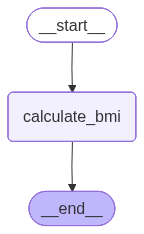

In [26]:
##  Visulizing the Graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())


## Sequential Workflow with Some Conditions | Complexity Increases|

In above We simply Calculating BMI , Now after calculating BMI we will Give Label that person is obese, healthy based on Bmi values

In [27]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict

In [28]:
# Define State
class BMIState(TypedDict):
    weight: float
    height: float
    bmi: float
    category: str

In [29]:
def calculate_bmi(state: BMIState) -> BMIState :  # When node of Graph Execute , oss node ko input main graph kaa State milta hai and return bhi state krta hai
    weight = state['weight']
    height = state['height']
    
    bmi = weight/(height**2) # Formula of BMI Calculation
    state['bmi'] = round(bmi,2) # partial State Update | updating State Value after calculating Bmi 
    return {'bmi' : bmi}

def label_bmi(state: BMIState) -> BMIState:
    bmi = state['bmi']

    if bmi < 18.5:
        state['category'] = 'UnderWeight'
    elif 18.5 <= bmi < 25:
        state['category'] = 'Neutral'
    elif 25 <= bmi <30:
        state['category'] = 'overweight'
    else :
        state['category'] = 'obese'
    
    return state



In [31]:
# Define Graph 
graph= StateGraph(BMIState)

# Add nodes to your Graph
graph.add_node('calculate_bmi',calculate_bmi)  # ("nodeName","pythonFunction") // python function is function which actually executre when ,call to this node . As internally every node is a python function.
graph.add_node ('label_bmi',label_bmi)

# Add Edges to your Graph
graph.add_edge(START , 'calculate_bmi' )  # edge(start_place|node , end_Node)
graph.add_edge('calculate_bmi','label_bmi')
graph.add_edge('label_bmi' , END)


# Compile the Graph
workflow = graph.compile()

In [32]:
output_state = workflow.invoke({'weight':80,'height':1.73}) # Sincw when graph is created it take state as i/p  and it also return therefore state as output
print(output_state)

{'weight': 80, 'height': 1.73, 'bmi': 26.729927495071667, 'category': 'overweight'}


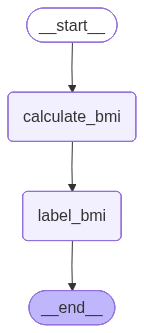

In [33]:
##  Visulizing the Graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

## Sequential Workflow | LLM Based

In [37]:
from langgraph.graph import StateGraph , START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

True

In [35]:
model = ChatOpenAI()

In [36]:
# Define a State
class LLMState(TypedDict):
    question : str
    answer : str

In [40]:
def llm_qa(state: LLMState) -> LLMState :
    # Extract Question from state
    question = state['question']

    # Form a Prompt
    prompt = f'Answer the Following question {question}'

    # Ask that Question to LLM
    answer = model.invoke(prompt).content

    # Upate answer in state
    state['answer'] = answer

    return state

In [41]:
# Deine Graph
graph = StateGraph(LLMState)

# Add nodes
graph.add_node("llm_qa", llm_qa)

# Add Edges
graph.add_edge(START,'llm_qa')
graph.add_edge('llm_qa',END)

# Compile graph
workflow = graph.compile()


In [ ]:
# Execute Graph
initial_state = {'question' : 'what is speed of light'}
final_state = workflow.invoke(initial_state)
print(final_state)

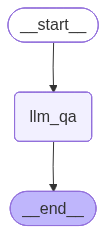

In [42]:
##  Visulizing the Graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())